In [5]:
from imp import reload
from IPython.display import display, Markdown, Latex
from tqdm import tqdm
import seaborn as sns
import math
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage import measure,data,color

from scipy.spatial.distance import cdist
# import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


def set_style():
    sns.set_style('whitegrid')
    plt.rcParams['font.sans-serif'] = ['SimHei']
    plt.rcParams['axes.unicode_minus'] = False
    pd.options.display.max_columns = 300
    pd.options.display.max_rows = 1000
    # plt.rcParams['figure.dpi'] = 200
    sns.set_palette('muted')  # 调色板颜色温和
    sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 1})

set_style()

## 颜色通道分析

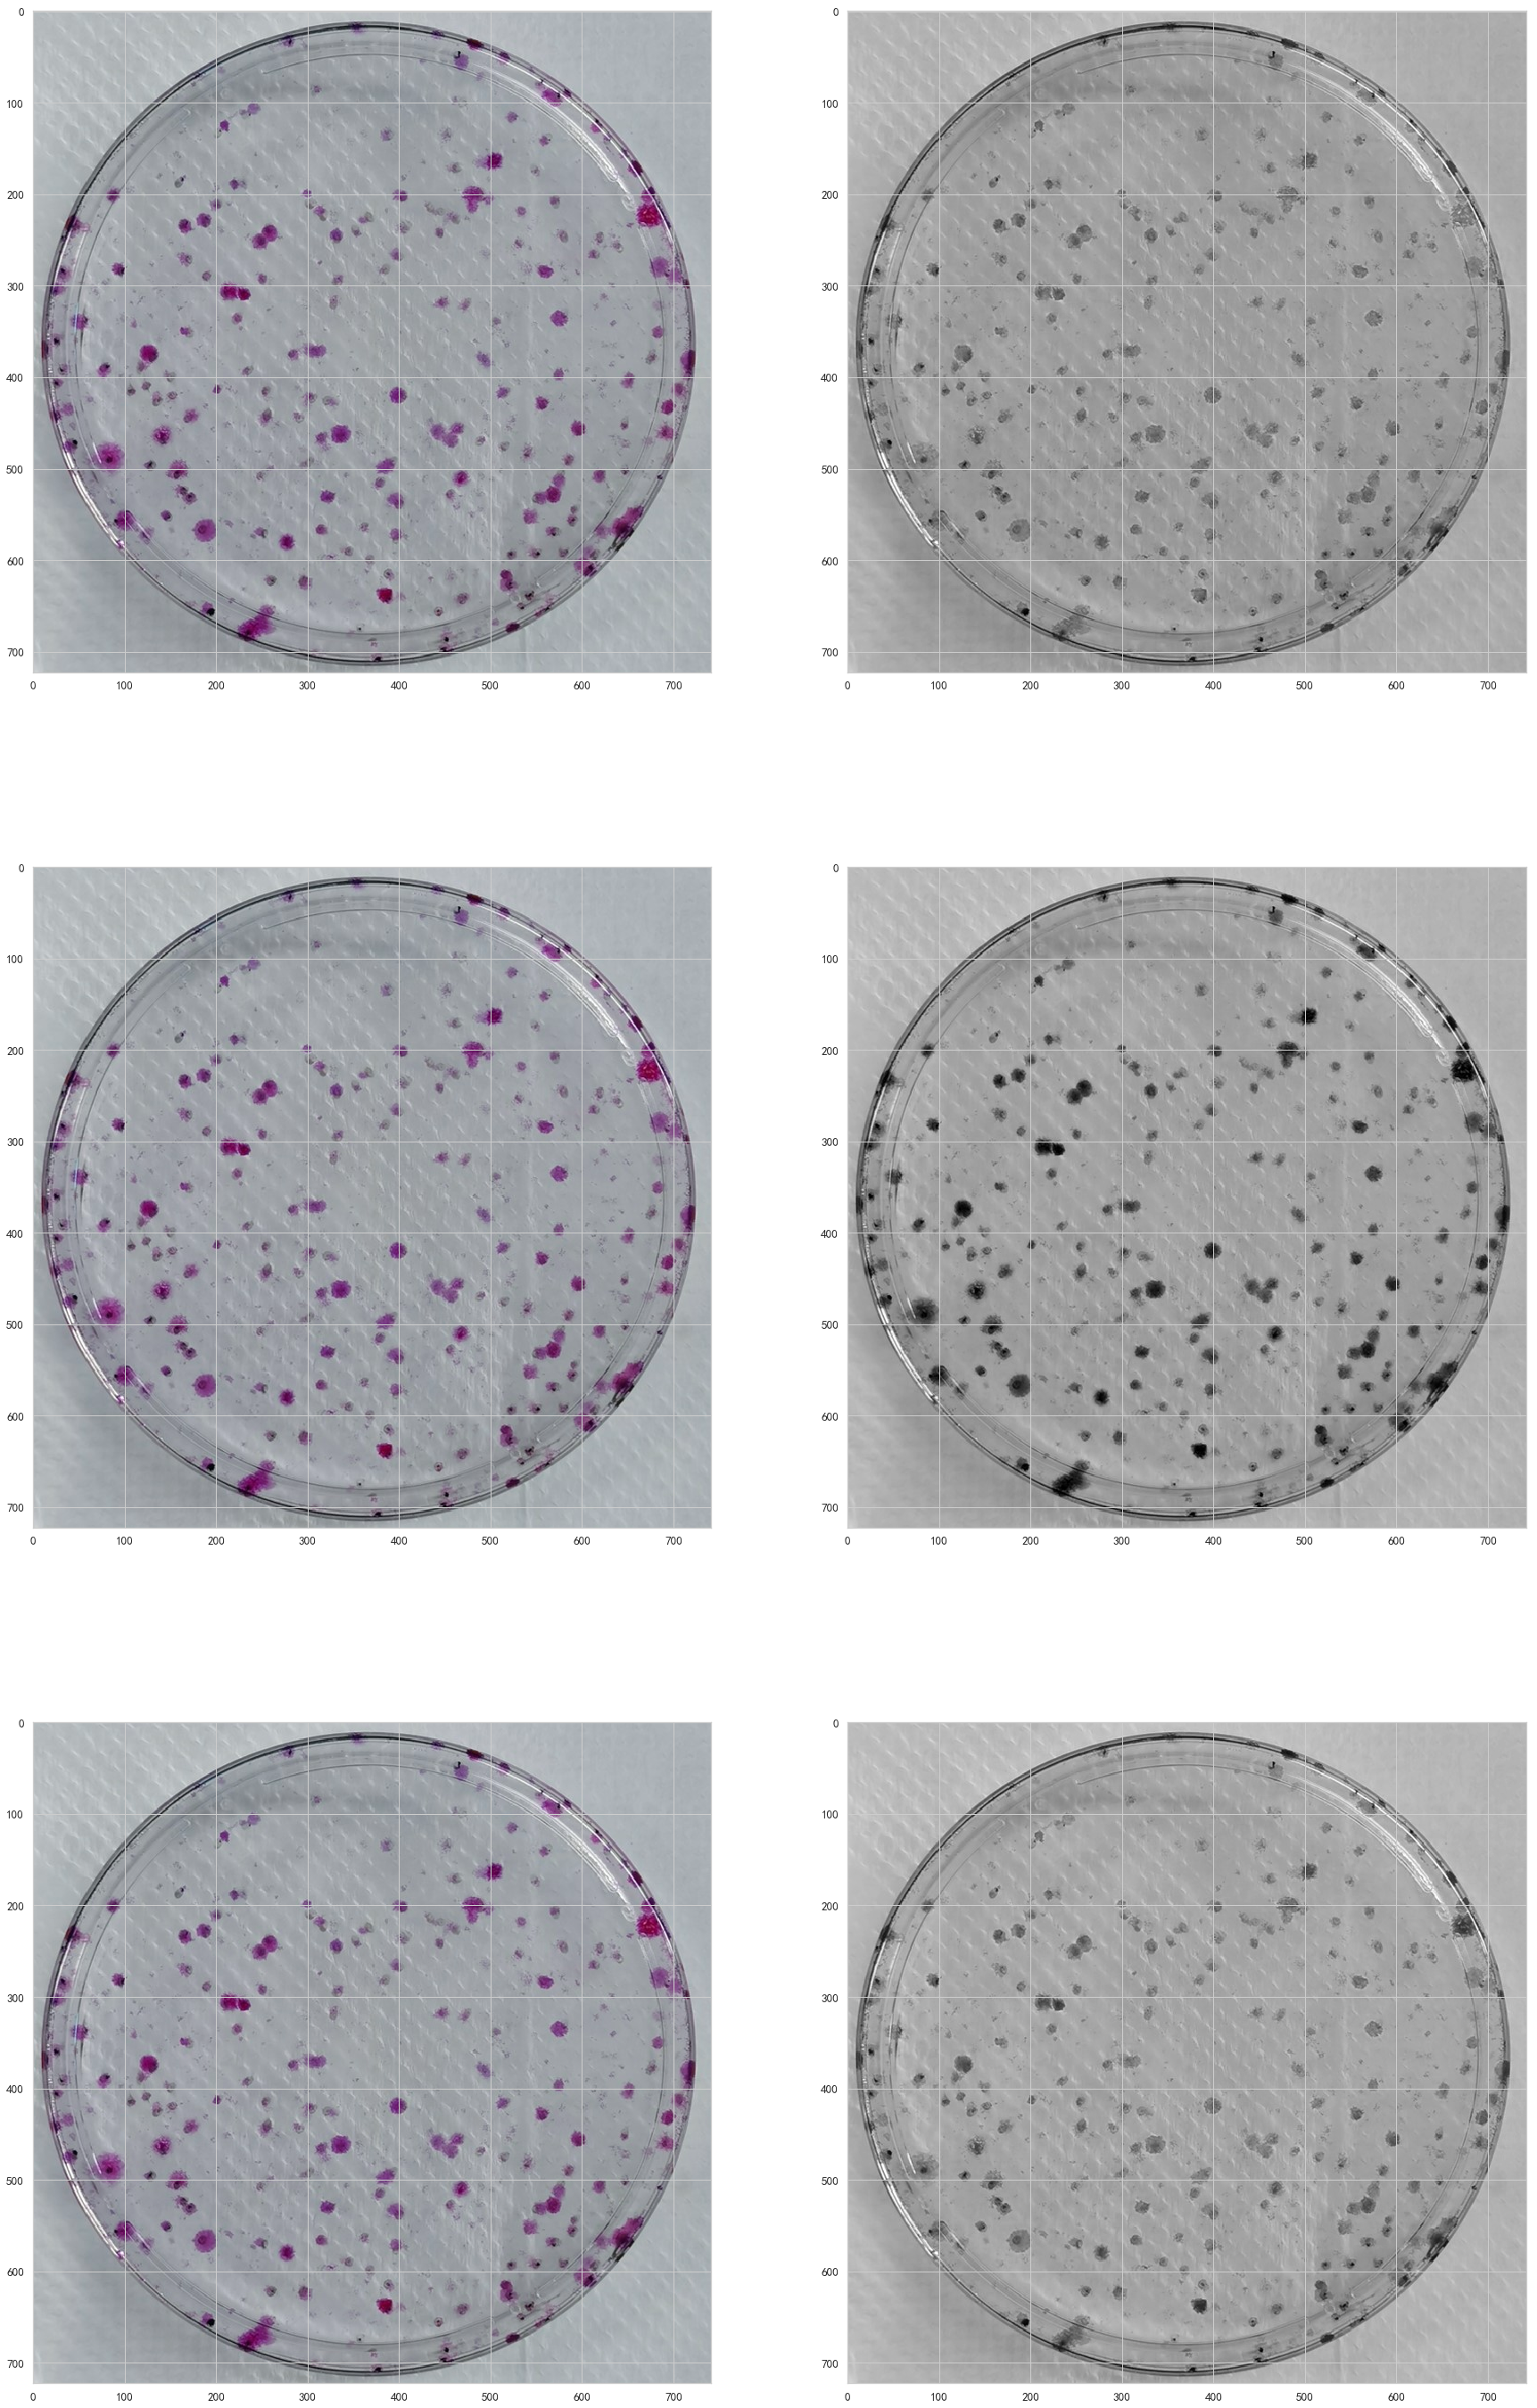

In [6]:
file_path = '../data/cells1/187.jpg'
img = cv2.imread(file_path)
fig,ax = plt.subplots(3,2,figsize=(30,50))

# 第一列全放原图
ax[0][0].imshow(img)
ax[1][0].imshow(img)
ax[2][0].imshow(img)

# 第二列放灰度图用于对比
img_b = img[:,:,0]
ax[0][1].imshow(img_b,'gray')
img_g = img[:,:,1]
ax[1,1].imshow(img_g,'gray')
img_r = img[:,:,2]
ax[2,1].imshow(img_r,'gray')

plt.show()

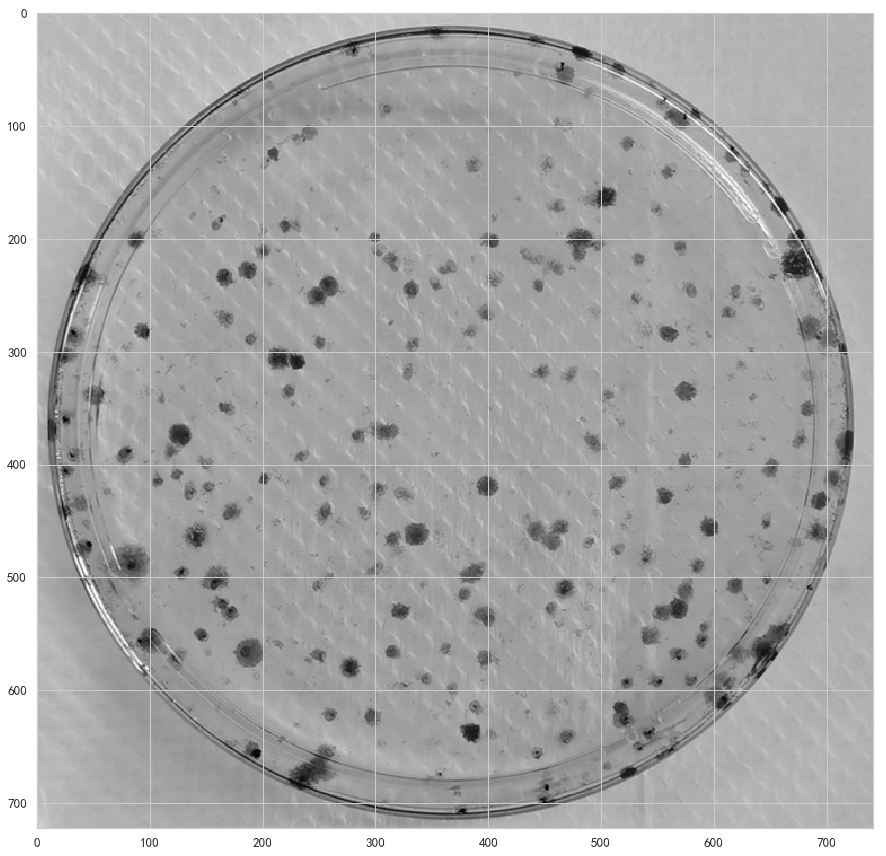

In [7]:
img = cv2.imread(file_path, 0)
plt.figure(figsize=(20,15))
plt.imshow(img,'gray')
plt.show()

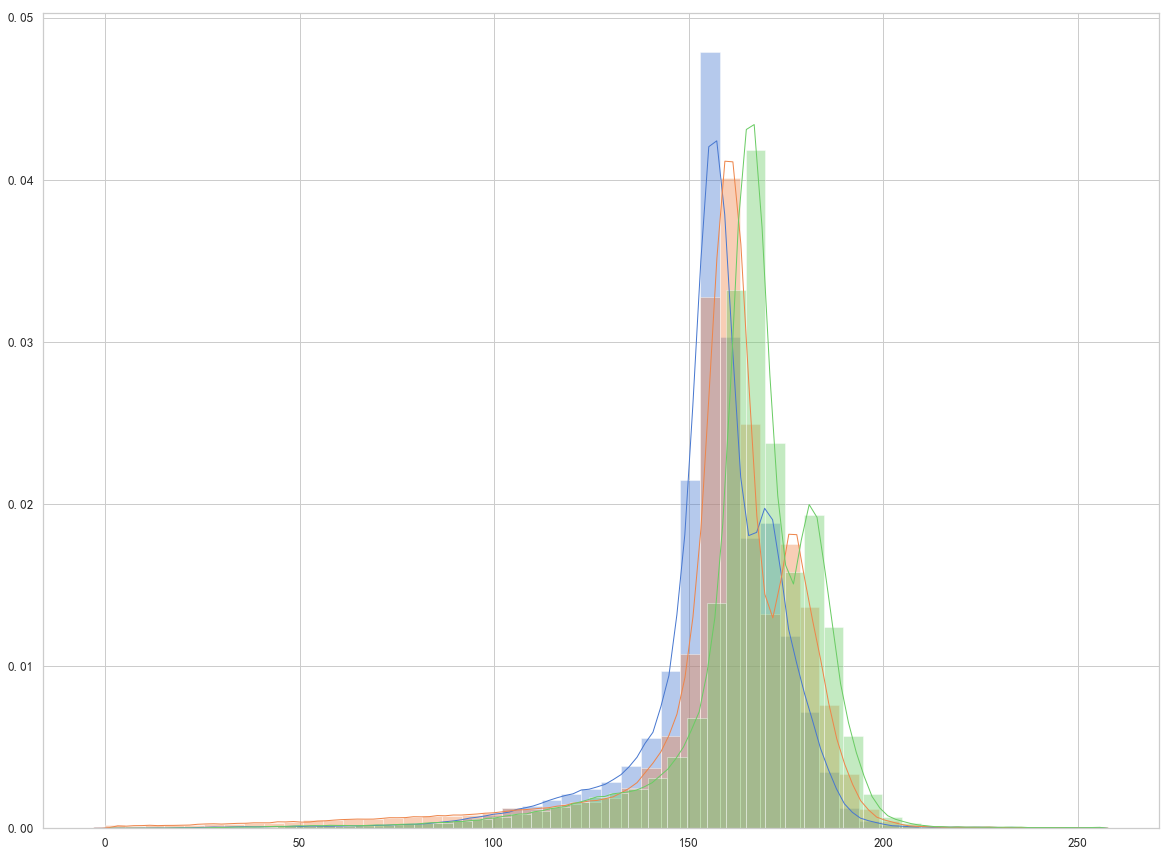

In [8]:
img_bgr = cv2.imread(file_path)
plt.figure(figsize=(20,15))
sns.distplot(img_bgr[:,:,0].flatten())
sns.distplot(img_bgr[:,:,1].flatten())
sns.distplot(img_bgr[:,:,2].flatten())

## 霍夫圆检测

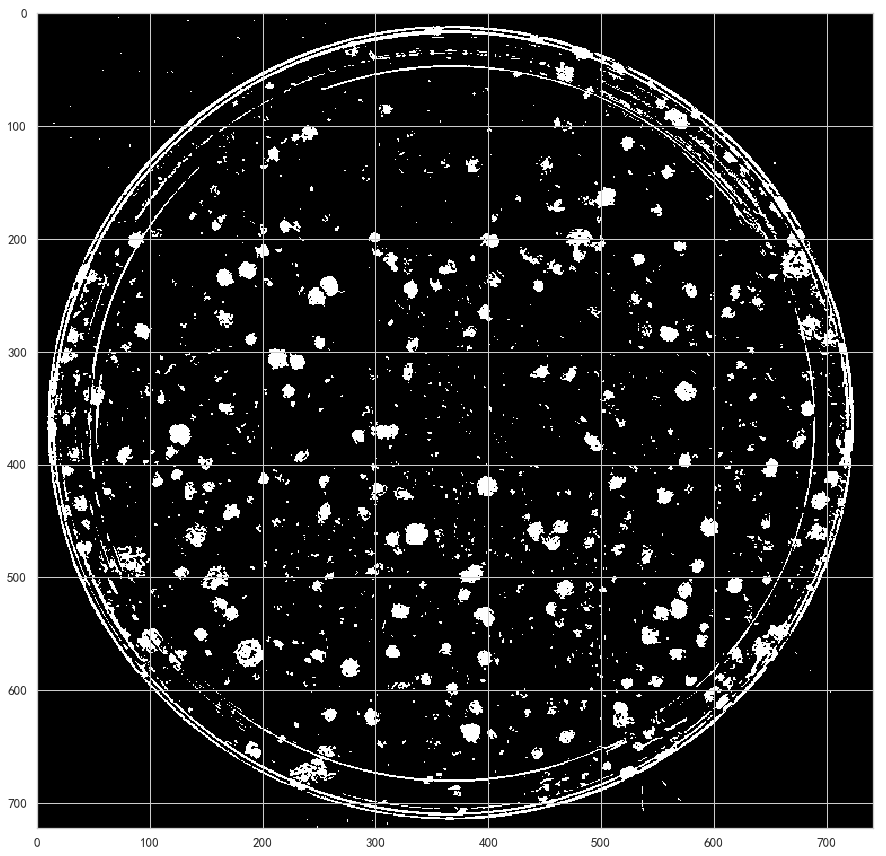

In [9]:
img = cv2.imread(file_path)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_green = img[:,:,1]
img_bin = cv2.adaptiveThreshold(
    img_green, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 25, 10)

plt.figure(figsize=(20,15))
plt.imshow(img_bin,'gray')

In [10]:
circles = cv2.HoughCircles(img_gray, cv2.HOUGH_GRADIENT,dp=1,minDist=100,minRadius=300)

In [11]:
circles

array([[[364.5, 363.5, 351.8]]], dtype=float32)

In [12]:
circles[0,0][2]+3

354.79998779296875

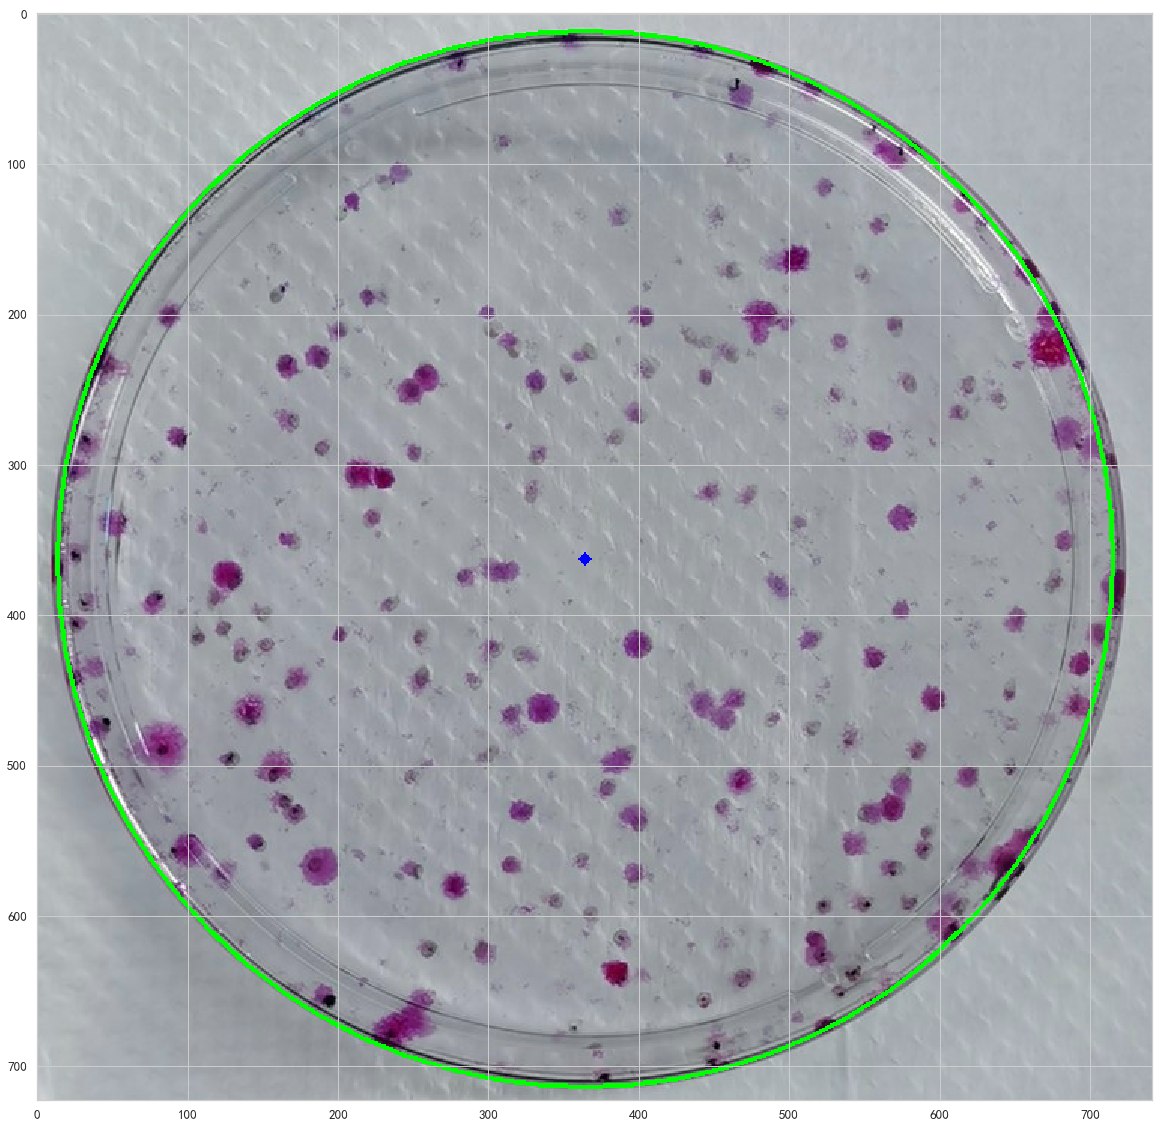

In [13]:
# img_bgr = cv2.imread(file_path)
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(img_bgr,(i[0],i[1]),int(i[2]),(0,255,0),2)
    # draw the center of the circle
    cv2.circle(img_bgr,(i[0],i[1]),2,(0,0,255),3)
plt.figure(figsize=(30,20))
plt.imshow(img_bgr)

In [14]:
img.reshape((-1,3)).shape

(536466, 3)

## 图像聚类

In [19]:
file_path = '../data/cells1/187.jpg'
img = cv2.imread(file_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

data = img.reshape((-1,3))
data = np.float32(data)
print(data.shape)

(536466, 3)


In [ ]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

#设置标签
flags = cv2.KMEANS_RANDOM_CENTERS

#K-Means聚类 聚集成2类
compactness, labels2, centers2 = cv2.kmeans(data, 2, None, criteria, 10, flags)

In [20]:
centers2

array([[116,  88, 111],
       [170, 164, 160]], dtype=uint8)

In [25]:
print(labels2.shape)
labels2[20:30]

(536466, 1)


array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1]], dtype=int32)

In [26]:
labels2.flatten().shape

(536466,)

In [27]:
centers2[labels2.flatten()[:5]]

array([[170, 164, 160],
       [170, 164, 160],
       [170, 164, 160],
       [170, 164, 160],
       [170, 164, 160]], dtype=uint8)

In [ ]:
#图像转换回uint8二维类型
centers2 = np.uint8(centers2)
res = centers2[labels2.flatten()]  # 选择每个一点的类别
dst2 = res.reshape((img.shape))  # 再将点画回到

In [15]:
# #K-Means聚类 聚集成4类
# compactness, labels4, centers4 = cv2.kmeans(data, 4, None, criteria, 10, flags)

# #K-Means聚类 聚集成8类
# compactness, labels8, centers8 = cv2.kmeans(data, 8, None, criteria, 10, flags)

# #K-Means聚类 聚集成16类
# compactness, labels16, centers16 = cv2.kmeans(data, 16, None, criteria, 10, flags)

# #K-Means聚类 聚集成64类
# compactness, labels64, centers64 = cv2.kmeans(data, 64, None, criteria, 10, flags)



# centers4 = np.uint8(centers4)
# res = centers4[labels4.flatten()]
# dst4 = res.reshape((img.shape))

# centers8 = np.uint8(centers8)
# res = centers8[labels8.flatten()]
# dst8 = res.reshape((img.shape))

# centers16 = np.uint8(centers16)
# res = centers16[labels16.flatten()]
# dst16 = res.reshape((img.shape))

# centers64 = np.uint8(centers64)
# res = centers64[labels64.flatten()]
# dst64 = res.reshape((img.shape))

#显示图像
# titles = [u'原始图像', u'聚类图像 K=2', u'聚类图像 K=4',
#           u'聚类图像 K=8', u'聚类图像 K=16',  u'聚类图像 K=64']  
# images = [img, dst2, dst4, dst8, dst16, dst64]

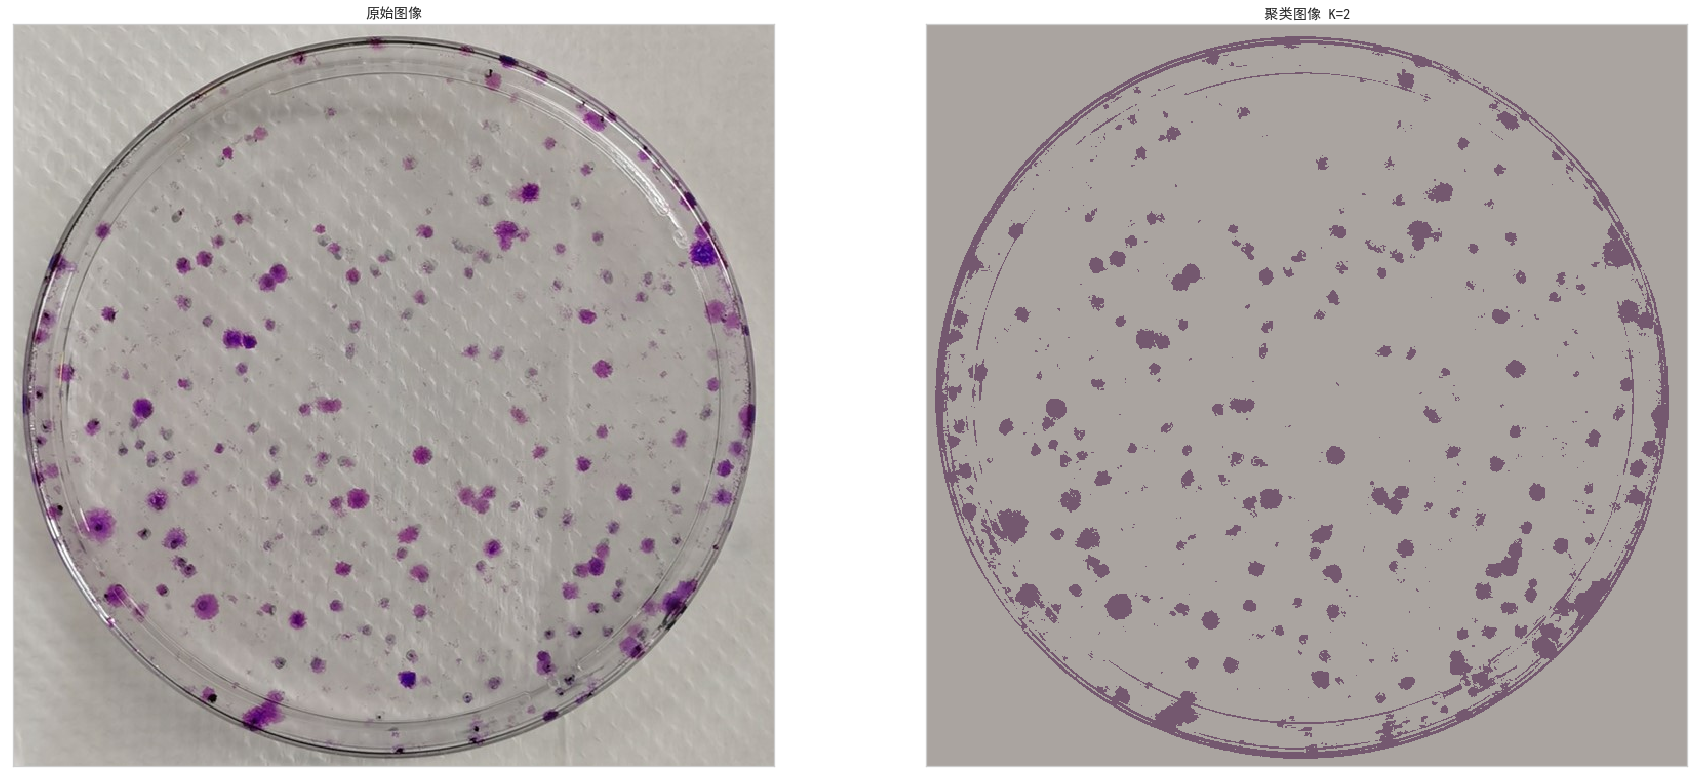

In [16]:
titles = [u'原始图像', u'聚类图像 K=2']  
images = [img, dst2]
plt.figure(figsize=(30,20))
for i in range(2):  
    plt.subplot(1,2,i+1), plt.imshow(images[i], 'gray'), 
    plt.title(titles[i])  
    plt.xticks([]),plt.yticks([])  
plt.show()